In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../metadata/Austin_B-Cycle_Trips_extended_ordered.csv', index_col=0)
data.head()

/home/grayson/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:379: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Trip ID,Membership Type,Bicycle ID,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Day,Day of Week,Checkout Epoch Time,Return Epoch Time
0,9900333979,Founding Member (Austin B-cycle),966.0,9:12:00,2495.0,4th & Congress,2500.0,Republic Square,5,12,2013,21,5,1387638720,1387639020
1,9900333980,Annual Membership (Austin B-cycle),36.0,9:12:00,2496.0,8th & Congress,2497.0,Capitol Station / Congress & 11th,5,12,2013,21,5,1387638720,1387639020
2,9900333981,24-Hour Kiosk (Austin B-cycle),101.0,10:12:00,2500.0,Republic Square,2503.0,South Congress & James,19,12,2013,21,5,1387642320,1387643460
3,9900333982,24-Hour Kiosk (Austin B-cycle),252.0,13:12:00,2497.0,Capitol Station / Congress & 11th,2497.0,Capitol Station / Congress & 11th,4,12,2013,21,5,1387653120,1387653360
4,9900333983,24-Hour Kiosk (Austin B-cycle),287.0,13:12:00,2501.0,5th & Bowie,2495.0,4th & Congress,12,12,2013,21,5,1387653120,1387653840


In [3]:
kiosk = dict()
for index, row in data.iterrows():
    if row['Checkout Kiosk'] not in kiosk:
        kiosk[row['Checkout Kiosk']] = [0,0]
        
    if row['Return Kiosk'] not in kiosk:
        kiosk[row['Return Kiosk']] = [0,0]
    
    kiosk[row['Checkout Kiosk']][0] += 1
    kiosk[row['Return Kiosk']][1] += 1
    
#List kiosks with significant checkout/return difference
for key in kiosk:
    total = float(kiosk[key][0] + kiosk[key][1])
    diff = float(abs(kiosk[key][0] - kiosk[key][1]))
    if diff/total > .1:
        print(key + ': ')
        print('    ' + str(kiosk[key][0]))
        print('    ' + str(kiosk[key][1]))

East 11th St. at Victory Grill: 
    5320
    4055
Re-branding: 
    7
    2
State Capitol @ 14th & Colorado: 
    5265
    4002
Shop: 
    10
    39
10th & Red River: 
    62
    45
Mobile Station @ Bike Fest: 
    516
    106
Earth Day ATX 2017: 
    0
    2
Main Shop: 
    0
    2
Stolen: 
    1
    23
8th & Lavaca: 
    52
    27
23rd & San Jacinto @ DKR Stadium: 
    7360
    10322
17th & Guadalupe: 
    10406
    8317
Mobile Station: 
    1183
    905
Customer Service: 
    4
    152
11th & San Jacinto: 
    4506
    2984
Repair Shop: 
    15
    159
Mobile Station @ Unplugged: 
    4
    13
Eeyore's 2018: 
    2
    0
Eeyore's 2017: 
    1
    4
6th & Navasota St.: 
    1301
    1032
Mobile Station @ Boardwalk Opening Ceremony: 
    9
    4
Rosewood & Angelina: 
    39
    23
ACC - Rio Grande & 12th: 
    1778
    1320
East 11th St. & San Marcos: 
    10903
    8432
Fantasy Zilker: 
    0
    23
Missing: 
    0
    25
Marketing Event: 
    4
    12
MapJam at Hops & Grain Brewery

No big checkout/return splits

In [4]:
membershipNames = dict()
ind = 0
for index, row in data.iterrows():
    if row['Membership Type'] not in membershipNames:
        membershipNames[row['Membership Type']] = ind
        ind += 1
print(membershipNames)

membershipNamesOrdered = list()
for n in membershipNames:
    membershipNamesOrdered.append(None)
for name in membershipNames:
    membershipNamesOrdered[membershipNames[name]] = name
print(membershipNamesOrdered)

{'Annual ': 37, 'Denver B-cycle Founder': 49, 'Local365+Guest Pass': 51, 'Annual Membership (Fort Worth Bike Sharing)': 9, 'Semester Membership (Austin B-cycle)': 10, 'Membership: pay once  one-year commitment': 33, nan: 52, 'Annual Membership (GREENbike)': 19, 'UT Student Membership': 55, 'HT Ram Membership': 59, 'PROHIBITED': 41, 'Founding Member': 22, 'U.T. Student Membership': 54, 'Local30': 30, 'FunFunFun Fest 3 Day Pass': 26, '7-Day': 24, 'Explorer': 25, '24-Hour-Online (Austin B-cycle)': 8, 'RESTRICTED': 40, 'Local365 Youth with helmet (age 13-17 riders)': 35, 'Annual (Kansas City B-cycle)': 14, 'Annual Member': 38, 'Annual Membership (Austin B-cycle)': 1, 'Annual (San Antonio B-cycle)': 5, 'Annual (Madison B-cycle)': 3, 'Annual (Cincy Red Bike)': 21, 'Weekender ($15 plus tax)': 42, 'Annual Membership': 34, 'RideScout Single Ride': 36, 'Weekender': 31, 'Annual': 32, 'Local365 ($80 plus tax)': 43, 'Try Before You Buy Special': 48, 'Annual Membership (Indy - Pacers Bikeshare )': 1

In [5]:
monthWords = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 
              'August', 'September', 'October', 'November', 'December']
members = dict()
year = 2014 
monthLabels = dict()
for index, row in data[data['Year'] > 2014].iterrows():
    if row['Year'] > year:
        print(row['Year'])
        year = row['Year']
    month = row['Month']-1 + (row['Year']-2015)*12
    if not month in monthLabels:
        monthLabels[month] = monthWords[row['Month']] + ' ' + str(row['Year'])
    if month not in members:
        members[month] = list()
        for name in membershipNames:
            members[month].append(0)
    
    members[month][membershipNames[row['Membership Type']]] += 1

2015
2016
2017
2018


In [6]:
df = list()
for month in members:
    item = list()
    item.append(month)
    for memberType in membershipNamesOrdered:
        item.append(members[month][membershipNames[memberType]])
    df.append(item)

In [7]:
monthly = pd.DataFrame(np.array(df), columns=['Month'] + membershipNamesOrdered)

In [8]:
def getTotal(row):
    total = 0
    for i in range(0, len(row)):
        total += row.iloc[i]
    return total

if 'Total' in monthly.keys():
    del monthly['Total']
monthly['Total'] = monthly.apply(getTotal, axis=1)
monthly.to_csv('monthly.csv')
monthly

,Month,Founding Member (Austin B-cycle),Annual Membership (Austin B-cycle),24-Hour Kiosk (Austin B-cycle),Annual (Madison B-cycle),Annual (Broward B-cycle),Annual (San Antonio B-cycle),7-Day Membership (Austin B-cycle),Annual (Boulder B-cycle),24-Hour-Online (Austin B-cycle),...,Local365+Guest Pass,nan,Local365 Youth (age 13-17 riders),U.T. Student Membership,UT Student Membership,Madtown Monthly,Annual Plus Membership,Aluminum Access,HT Ram Membership,Total
0,0,0,0,0,9,0,3,0,6,0,...,0,0,0,0,0,0,0,0,0,7765
1,1,0,0,0,15,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,9573
2,2,0,0,0,29,0,47,0,32,0,...,0,0,0,0,0,0,0,0,0,30114
3,3,0,0,0,45,0,30,0,2,0,...,0,0,0,0,0,0,0,0,0,16557
4,4,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,15846
5,5,0,0,0,3,0,6,0,2,0,...,0,0,0,0,0,0,0,0,0,13899
6,6,0,0,0,2,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,16338
7,7,0,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,14530
8,8,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15252
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22873


In [9]:
df = list()
for index, row in monthly.iterrows():
    item = list()
    item.append(monthLabels[row['Month']])
    item.append(int(row['Total']-int(row['U.T. Student Membership'])))
    item.append(row['U.T. Student Membership'])
    df.append(item)
monthlyBi = pd.DataFrame(np.array(df), columns=['Month', 'Other String', 'U.T. Student Membership String'])
monthlyBi

,Month,Other String,U.T. Student Membership String
0,January 2015,7765,0
1,February 2015,9573,0
2,March 2015,30114,0
3,April 2015,16557,0
4,May 2015,15846,0
5,June 2015,13899,0
6,July 2015,16338,0
7,August 2015,14530,0
8,September 2015,15252,0
9,October 2015,22873,0


In [10]:
def intOther(row):
    return int(row['Other String'])
def intStudent(row):
    return int(row['U.T. Student Membership String'])
monthlyBi['Other'] = monthlyBi.apply(intOther, axis=1)
monthlyBi['U.T. Student Membership'] = monthlyBi.apply(intStudent, axis=1)

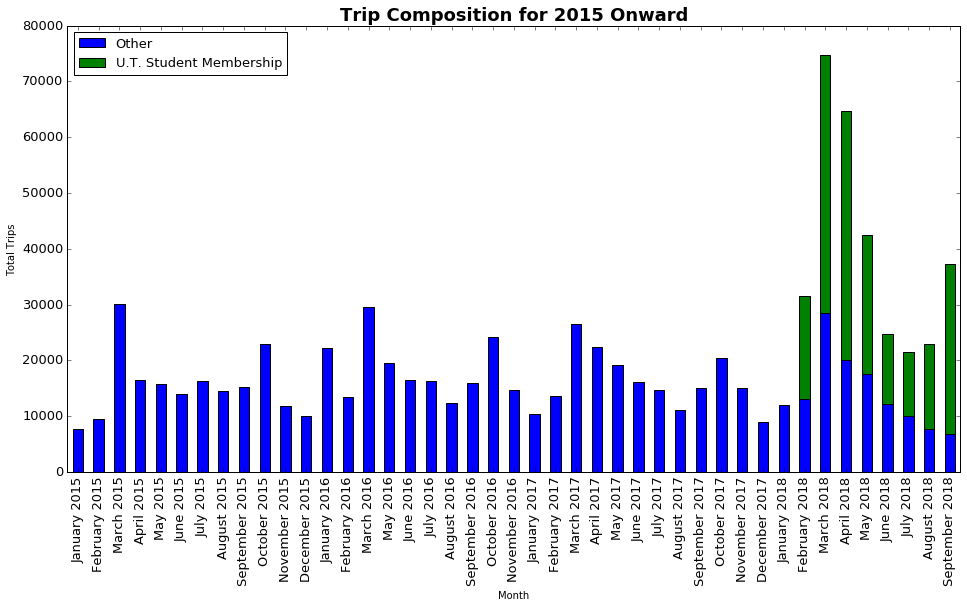

In [11]:
ax1 = (monthlyBi[['Month', 'Other', 'U.T. Student Membership']]
       .plot.bar(x='Month', y=['Other', 'U.T. Student Membership'], stacked=True, figsize=(16,8)))
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Trips')
ax1.set_title('Trip Composition for 2015 Onward',  fontdict={'size' : 18, 'weight' : 'bold'})
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=13)
ax1.legend(fontsize=13, loc="upper left")
plt.savefig('monthly.png', bbox_inches='tight')